importing libraries

In [140]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils


# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,mean_squared_log_error
# from sklearn.metrics import classification_report,confusion_matrix

read data into pandas frames

In [141]:
data_set = pd.read_csv('House Sales.csv')
data_set = data_set[0:5000] 
print(len(data_set))
print(data_set.columns.values)
data_set.head()

5000
['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Pre-processing data

In [142]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5000 non-null   int64  
 1   date           5000 non-null   object 
 2   price          5000 non-null   float64
 3   bedrooms       5000 non-null   int64  
 4   bathrooms      5000 non-null   float64
 5   sqft_living    5000 non-null   int64  
 6   sqft_lot       5000 non-null   int64  
 7   floors         5000 non-null   float64
 8   waterfront     5000 non-null   int64  
 9   view           5000 non-null   int64  
 10  condition      5000 non-null   int64  
 11  grade          5000 non-null   int64  
 12  sqft_above     5000 non-null   int64  
 13  sqft_basement  5000 non-null   int64  
 14  yr_built       5000 non-null   int64  
 15  yr_renovated   5000 non-null   int64  
 16  zipcode        5000 non-null   int64  
 17  lat            5000 non-null   float64
 18  long    

In [143]:
print(data_set.corr()['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.699505
grade            0.648233
sqft_above       0.606221
sqft_living15    0.589017
bathrooms        0.520929
view             0.407651
waterfront       0.339497
sqft_basement    0.328572
bedrooms         0.300427
lat              0.299475
floors           0.275765
yr_renovated     0.136746
sqft_lot15       0.079796
sqft_lot         0.070591
condition        0.052646
yr_built         0.032275
id               0.012937
long             0.006084
zipcode         -0.055676
Name: price, dtype: float64


In [144]:
data_set.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [145]:
data_set = data_set.drop('zipcode',axis=1)
data_set = data_set.drop('id',axis=1)

data_set['date'] = pd.to_datetime(data_set['date'])

data_set['month'] = data_set['date'].apply(lambda date:date.month)
data_set['year'] = data_set['date'].apply(lambda date:date.year)

data_set = data_set.drop('date',axis=1)


indicating the price as an output label and remove it from features
dataset split into 80%-20% for train_data and test_data

In [146]:
x = data_set.drop('price',axis=1)
# x = data_set.drop('zipcode',axis=1)

y = data_set['price']

# Spliting
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)



In [147]:
# x = data_set.drop('id',axis=1)


In [148]:
x_train.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
month              int64
year               int64
dtype: object

In [149]:
x_train.astype('float32')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
4227,2.0,2.50,1360.0,2070.0,2.0,0.0,0.0,3.0,8.0,1360.0,0.0,1999.0,0.0,47.642300,-122.329002,1920.0,2092.0,1.0,2015.0
4676,4.0,2.25,2290.0,10687.0,2.0,0.0,0.0,3.0,9.0,2290.0,0.0,1978.0,0.0,47.587799,-122.202003,2290.0,10300.0,5.0,2014.0
800,3.0,2.00,1340.0,2720.0,1.5,0.0,0.0,3.0,7.0,1340.0,0.0,1913.0,0.0,47.651798,-122.334999,2030.0,4590.0,8.0,2014.0
3671,3.0,2.00,2420.0,208652.0,1.5,0.0,0.0,3.0,8.0,2420.0,0.0,2005.0,0.0,47.366600,-121.977997,3180.0,212137.0,7.0,2014.0
4193,3.0,1.50,1340.0,1110.0,2.0,0.0,0.0,3.0,7.0,1040.0,300.0,1999.0,0.0,47.698002,-122.365997,1220.0,1110.0,9.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,3.0,2.75,2730.0,38869.0,1.5,1.0,4.0,3.0,9.0,1940.0,790.0,1963.0,2001.0,47.485699,-122.361000,2630.0,28188.0,9.0,2014.0
466,3.0,1.75,1480.0,6360.0,1.0,0.0,0.0,3.0,7.0,1480.0,0.0,1954.0,0.0,47.731098,-122.352997,1480.0,6360.0,12.0,2014.0
3092,3.0,2.50,2120.0,22482.0,1.0,0.0,0.0,5.0,7.0,1360.0,760.0,1979.0,0.0,47.341000,-122.264999,2330.0,16016.0,4.0,2015.0
3772,5.0,1.50,1830.0,94960.0,1.5,0.0,0.0,3.0,7.0,1830.0,0.0,1929.0,0.0,47.421799,-122.218002,1440.0,16365.0,9.0,2014.0


In [150]:
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x.columns.values)

(4000, 19)
(1000,)
(4000,)
(1000,)
['bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'waterfront'
 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15' 'month' 'year']


In [151]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

designing a single-layer MLP for predicting the price

In [152]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

# model.compile(optimizer='adam',loss='mse')
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


Training the model

In [153]:
history= model.fit(x=x_train, y=y_train.values, batch_size=128, epochs=400, validation_split=0.2)

Ploting the results

In [154]:
loss = pd.DataFrame(model.history.history)

plt.figure(figsize=(20,5))
sns.lineplot(data=loss, lw=3 )
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [155]:
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

Predicting and evaluating model 

In [156]:
# predictions on the test set
predictions = model.predict(x_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',data_set['price'].describe())

designing 2 layer MLP

In [157]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [158]:
history= model.fit(x=x_train, y=y_train.values, batch_size=128, epochs=400, validation_split=0.2)

Epoch 1/400
25/25 [==============================] - 2s 26ms/step - loss: 471147511808.0000 - val_loss: 374009266176.0000
Epoch 2/400
25/25 [==============================] - 0s 11ms/step - loss: 471145218048.0000 - val_loss: 374005956608.0000
Epoch 3/400
25/25 [==============================] - 0s 11ms/step - loss: 471138992128.0000 - val_loss: 373996781568.0000
Epoch 4/400
25/25 [==============================] - 0s 10ms/step - loss: 471123394560.0000 - val_loss: 373975777280.0000
Epoch 5/400
25/25 [==============================] - 0s 14ms/step - loss: 471090462720.0000 - val_loss: 373933080576.0000
Epoch 6/400
25/25 [==============================] - 0s 10ms/step - loss: 471026073600.0000 - val_loss: 373853159424.0000
Epoch 7/400
25/25 [==============================] - 0s 10ms/step - loss: 470911385600.0000 - val_loss: 373716221952.0000
Epoch 8/400
25/25 [==============================] - 0s 10ms/step - loss: 470723198976.0000 - val_loss: 373497397248.0000
Epoch 9/400
25/25 [=====

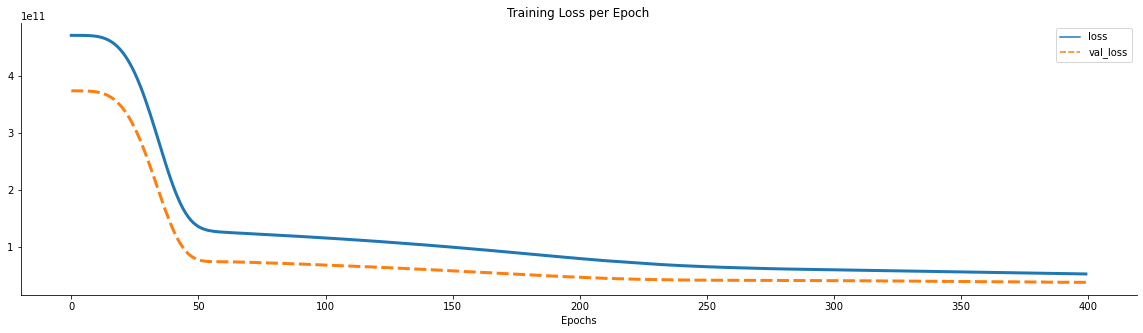

In [159]:
loss = pd.DataFrame(model.history.history)

plt.figure(figsize=(20,5))
sns.lineplot(data=loss, lw=3 )
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

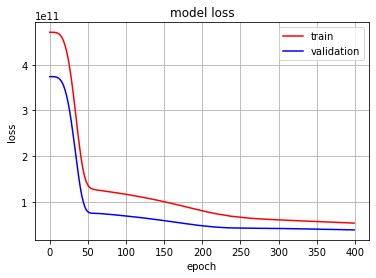

In [161]:

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

In [162]:
# predictions on the test set
predictions = model.predict(x_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',data_set['price'].describe())

MAE:  139705.6525394287
MSE:  46550981248.88464
RMSE:  215756.7640860528
Variance Regression Score:  0.587479881671737


Descriptive Statistics:
 count    5.000000e+03
mean     5.393680e+05
std      3.870982e+05
min      7.500000e+04
25%      3.179062e+05
50%      4.490000e+05
75%      6.500000e+05
max      7.062500e+06
Name: price, dtype: float64
